<a href="https://colab.research.google.com/github/ReImage-CollegeProject/Learn_PyTorch/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch Workflow

Resources:
* Book : https://www.learnpytorch.io/01_pytorch_workflow/

In [2]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inferences)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inferences)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn    # nn contains all of PyTorch's building blocks for neural network
import matplotlib.pyplot as plt


## check PyTorch version
torch.__version__


'2.1.0+cu118'

## 1. Data (Preparing and Loading)

data can be almost anything .. in machin leanring
* Excel spreadsheet
* images of any kind
* videos (YouTube has lots of data..)
* audio like songs or podcasts
* DNA
* text

Machine leaning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representaion

To showcase this, let's create some known data using Linear regression data

We'll use linear regression formula to make a straight line with known **parameters**.

In [4]:
 # create known parameter
 weight = 0.7
 bias = 0.3

 # create
 start = 0
 end = 1
 step = 0.02
 X = torch.arange(start,end,step).unsqueeze(dim=1) # tensor
 y = weight  * X + bias

 X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in Machine learning in general)

* Training set   - (60 - 80%)
* Validation set - (10 - 20%)
* Testing set    - (10 - 20%)

Let's create a training and test set with our data.


In [11]:

#  create a train/test split data from given dataset

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# we can create train split using `scikit learn` train test split
## search `scikit learn train test split`


len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [12]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

how to better visualize our data?

this is where the data explorer's moto comes in !!!

"Visualize, visualize, visualize"

In [24]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares the predictions:
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="#de1fc8", s=4, label="Testing data")

  # Are there predictions
  if predictions is not None:
    # plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


  #show legend
  plt.legend(prop={"size": 14})

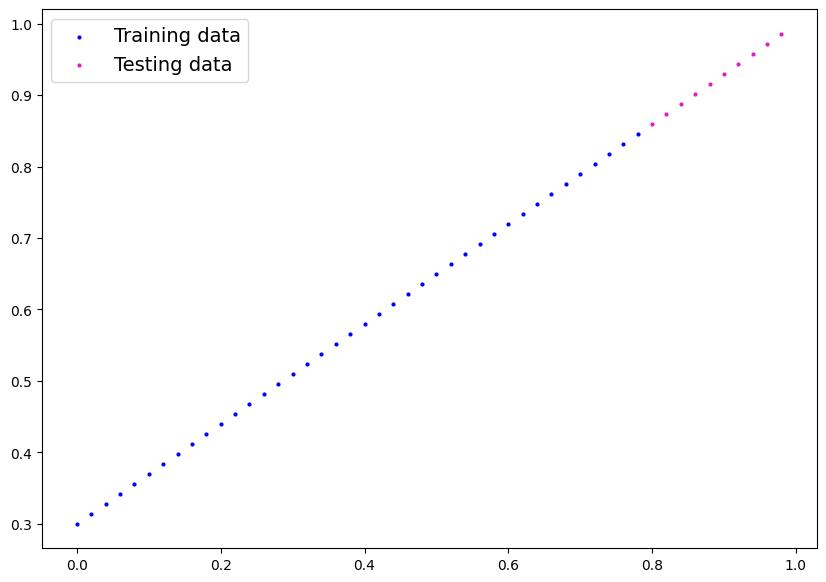

In [26]:
plot_predictions()

### Creating our first PyTorch model for linear regression



What our model does:
* start with random values (weight & bias)
* look at training data and adjus the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)


How to do so?

through two main algorithms:
1. Gradient descent
2. backpropagation

In [32]:
## y = mx + c
## y = ax + b

from torch import nn



# Create linear regresson model class
# `nn.Module` contains all the building blocks of the neural network
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherihts fom nn.Moudle
  def __init__(self):
    super().__init__()

    # Initialize the model parameters
    """ initialize the *model parameters to be used in various computaitons (these could be different layers from torch.nn,
    single parameter, hard-coded values or functions* """
    self.weights = nn.Parameter(torch.randn(1,    # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True,   # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float))   # <- PyTorch lovest the datatype torch.float32
    """ `requires_grad=True` means PyTorch will track the gradients of this specific parameter for use
    with `torch.autograd` and gradient descent (for many `torch.nn` moduels, `requires_grad=True` is set by default)  """

    self.bias = nn.Parameter(touch.randn(1,       # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True,  # <- can this parameter be updated via gradient descent ?
                                         dtype=torch.float))  # <- PyTorch loves the datatype torch.float32

    # Forward metho to define the computation in the model
    """Any subclass of the `nn.Module` needs to override forward()
    (this defines the forward computation of the model)"""
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
      return self.weights * x + self.bias     # this is the linear regression formula y = mx + b


## PyTorch model building essentials

* `torch.nn` - contains all of the building blocks for computation graphs (a neural network can be considered as computational graph)
* `torch.nn.Parameter` - what parameter should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us
* `torch.nn.Module` - base class for all the neural network modules, if you subclass it, you should override `forward()` method
* `torch.optim` - this is where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All the `nn.Module` subclasses require you to override the `forward()` method, this method define what happens in the forward computation  
* `torch.utils.data.Dataset` - Represent a map between key(label) and sample(features) pairs of your data. Such as images and their associated labels.
* `torch.utils.data.DataLoader` - Creates a Python iterable overa a torch Dataset (allows you to iterate over your data)




Resources:
 - PyTorch cheatsheet: https://pytorch.org/tutorials/beginner/ptcheat.html